# 1.3.2 Arithmetic Operations on Images

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = 250
y = 10
x+y

260

In [4]:
x = np.uint8([250])

In [5]:
print(x)

[250]


In [6]:
y = np.uint8([10])

In [7]:
print(y)

[10]


In [8]:
x+y

array([4], dtype=uint8)

In [9]:
#250+10= 26 0,1,2,,...,0,1,2,3,4,5

In [10]:
#0 black 255 white

In [11]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [12]:
img1 = cv2.imread('chihiro014.jpg')
img2 = cv2.imread('chihiro031.jpg')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
w = 0.5
cv2.namedWindow('image')
cv2.createTrackbar('Blend', 'image', 0, 255, lambda x: None)

while True:
    if cv2.waitKey(2) & 0xFF == 27:
        break
        
    blend = cv2.getTrackbarPos('Blend','image')
    
    a = blend / 255.0
    b = 1 - a
    
    img1 = cv2.imread('chihiro014.jpg')
    img2 = cv2.imread('chihiro031.jpg')
    dst = cv2.addWeighted(img1, a, img2, b, 0)
    
    cv2.imshow('image', dst)
    
cv2.destroyAllWindows()
cv2.waitKey(1)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [18]:
# Load two images
img1 = cv2.imread('chihiro006.jpg')
img2 = cv2.imread('1313.jpg')

In [18]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [19]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows,cols,channels)

275 300 3


In [18]:
roi = img1[0:rows, 0:cols ]

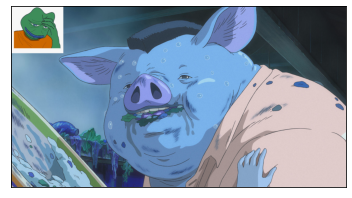

In [23]:
pltImage(img1)

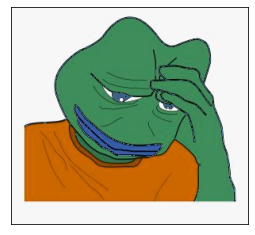

In [22]:
pltImage(roi)

In [18]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

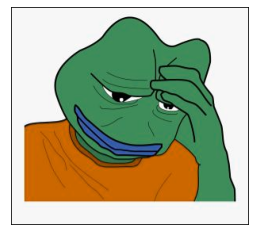

In [26]:
pltImage(img2)

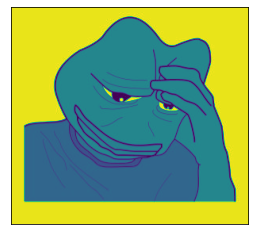

In [25]:
pltImage(img2gray)

In [27]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

In [28]:
pltImage(mask)

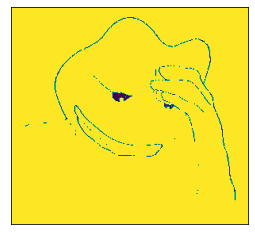

In [27]:
mask_inv = cv2.bitwise_not(mask)

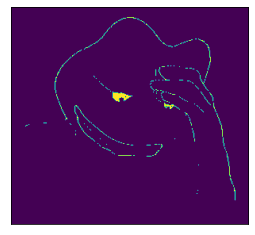

In [29]:
pltImage(mask_inv)

In [27]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

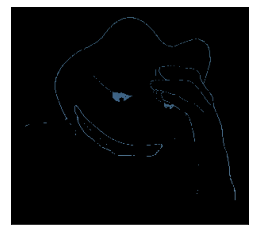

In [30]:
pltImage(img1_bg)

In [27]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

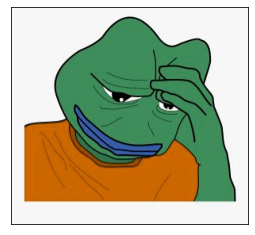

In [31]:
pltImage(img2_fg)

In [27]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [27]:
img1[0:rows, 0:cols ] = dst

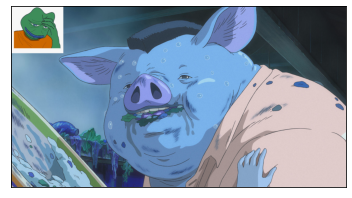

In [32]:
pltImage(img1)

In [27]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()